<a href="https://colab.research.google.com/github/kimsang-kyu/Python_application/blob/main/20200615_%EA%B5%B0%EC%A7%91%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
import pandas as pd

In [ ]:
###data load
iris = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv")
iris.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [ ]:
###입력변수(x)
x = iris.iloc[:,3:5]
x = StandardScaler().fit_transform(x)
y = iris.iloc[:,5]

In [ ]:
###k-means
model = KMeans(n_clusters=3)
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
###cluster
cluster_pred = model.labels_

In [ ]:
###교차표
pd.crosstab(y,cluster_pred)

col_0,0,1,2
Species,,,
setosa,50,0,0
versicolor,0,2,48
virginica,0,46,4


In [ ]:
import matplotlib.pyplot as plt

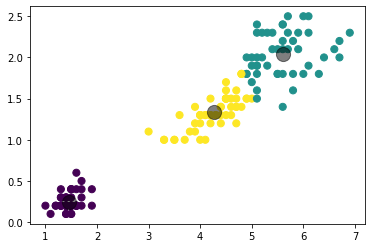

In [ ]:
###scatter plot
plt.scatter(x['Petal.Length'], x['Petal.Width'], c = cluster_pred, s = 50)
#centers
centers = model.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c = 'black',s = 200,alpha = 0.5)

###Inertia value를 이용한 적정 군집수 판단

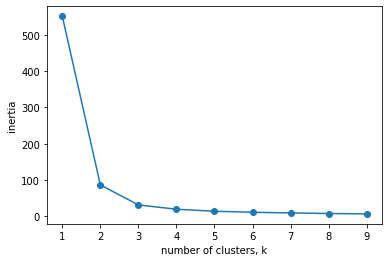

In [ ]:
ks = range(1,10)
inertias = []

for k in range(1,10):
  model = KMeans(n_clusters=k)
  model.fit(x)
  inertias.append(model.inertia_)

#plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

#커널화된 k-means

In [ ]:
from sklearn.datasets import make_moons

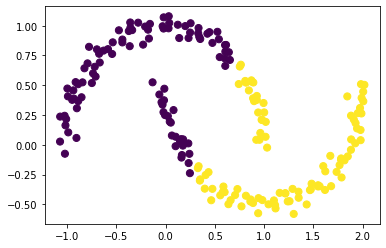

In [ ]:
#Ex, data
X, y = make_moons(200, noise = .05, random_state=0)
### K-means
labels = KMeans(2,random_state=0).fit_predict(X)
### scatter plot
plt.scatter(X[:,0], X[:,1], c = labels, s = 50)

In [ ]:
#
from sklearn.cluster import  SpectralClustering

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


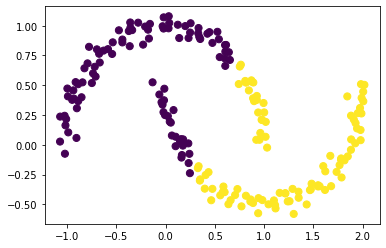

In [ ]:
### Spectral Clustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',assign_labels='kmeans')
label = model.fit_predict(X)
### scatter plot
plt.scatter(X[:,0],X[:,1], c = labels, s = 50)